# Flexible graphics with `ggplot2`

In [1]:
library(ggplot2)
library(tidyr)
suppressPackageStartupMessages(library(dplyr))

In [2]:
op <- options()
options(repr.plot.width=4, repr.plot.height=3)

## A tutorial example using the `iris` data set

In [3]:
head(iris, n = 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### `ggplot2` expects data in `tall` format

In [4]:
df <- iris %>% gather(variable, value, -Species)
head(df, n=3)

,Species,variable,value
1,setosa,Sepal.Length,5.1
2,setosa,Sepal.Length,4.9
3,setosa,Sepal.Length,4.7


### Make plot

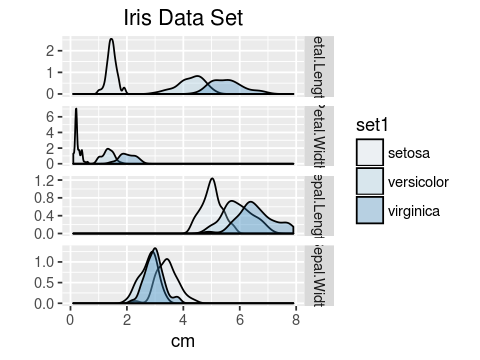

In [5]:
g <- ggplot(df, aes(x=value, fill=Species)) +
    geom_density(alpha=0.3) +
    facet_grid(variable ~ ., scales = "free_y") +
    labs(title="Iris Data Set", x="cm", y="", fill="Iris") +
    theme(plot.title = element_text(hjust=0.5)) +
    scale_fill_brewer("set1")
g

### Save plot as PDF

In [6]:
ggsave("iris_density.pdf", plot=g)

Saving 6.67 x 6.67 in image


### Check saved image

![Iris plot](./iris_density.pdf)

## What just happened?

There are several concepts that you need to understand how `ggplot` converts data into pictures.

### Major concept

- **data** refers to a *tidy* data frame with observations in rows and variables in columhs.
- **geom** (geometric objects) refer to graphic elements that represent the data such as points, lines, patches etc 
- **aes** (aesthetic attributes) are visual properties of geoms such as x,y-coordinates, line color

The major concept is that `ggpllot` maps data values or summaries to aesthetic attributes.

### Other concepts

- **scales** control the mapping from values in the data space to values in the aesthetic space
- **guides** provide an interpretation of visual properties in terms of the data space
- **stats** transform data values prior to being mapped to an aetheitc (often implicit in the geom)
- **labs** provide text labels
- **grouping** and **facets** allow you to condition on a discrete variiable or factor either wihtin the same plot (group) or as mulitple sub-plots (facet)
- **themes** general plot properties specifying the "look and feel" of the graphic

Try to identify the above concepts in this `ggplot` construction:

```R
g <- ggplot(df, aes(x=value, fill=Species)) +
    geom_density(alpha=0.3) +
    facet_grid(variable ~ ., scales = "free_y") +
    labs(title="Iris Data Set", x="cm", y="", fill="Iris") +
    theme(plot.title = element_text(hjust=0.5)) +
    scale_fill_brewer("set1")
```

### Geometric objects (geoms)

In [7]:
g <- ggplot(df, aes(x=variable, y=value))

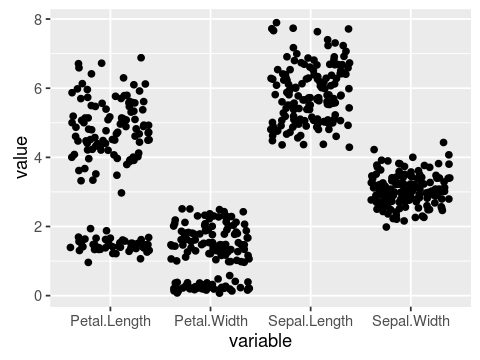

In [8]:
g + geom_jitter()

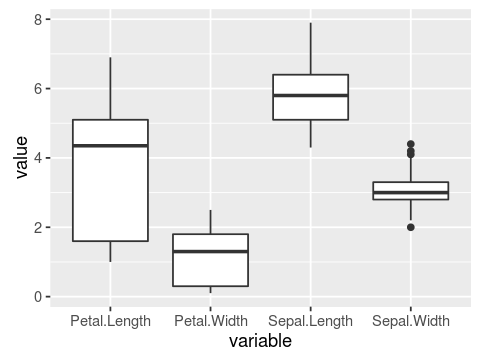

In [9]:
g + geom_boxplot()

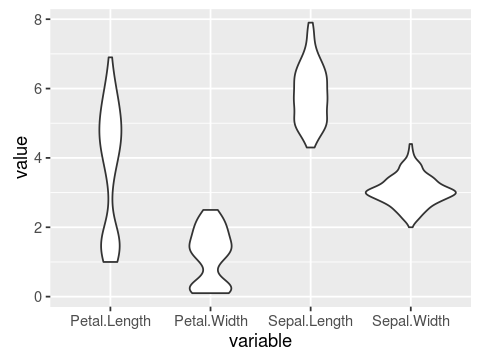

In [10]:
g + geom_violin()

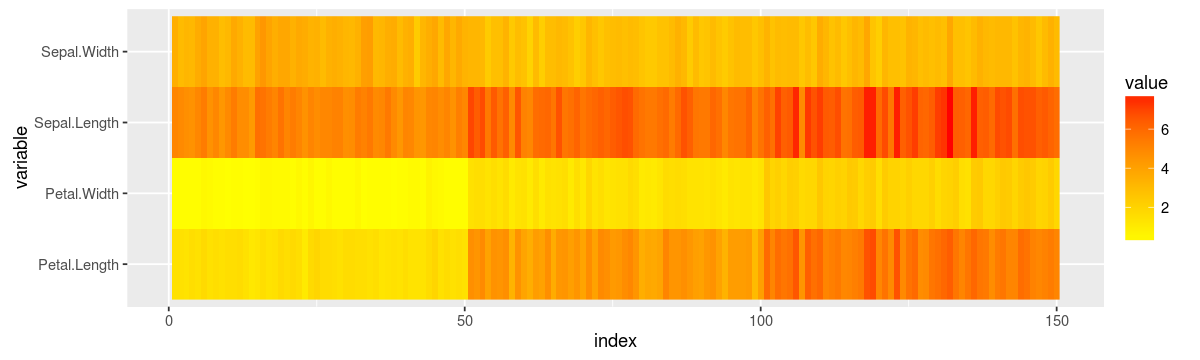

In [11]:
options(repr.plot.width=10, repr.plot.height=3)
df[,"index"] = rep(1:150, 4)
ggplot(df, aes(x=index, y=variable, fill=value)) +
scale_fill_gradient(low="yellow", high="red") +
geom_raster() 

### Aesthetic attributes (aes)

#### Aesthetic mapping

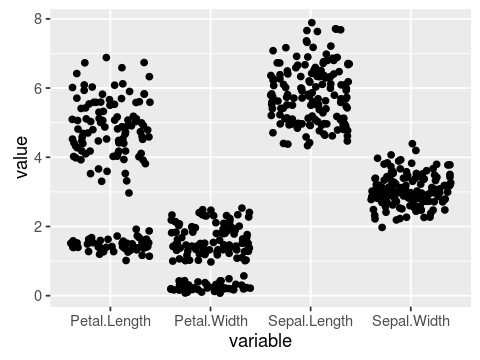

In [12]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(df, aes(x=variable, y=value)) + geom_jitter()

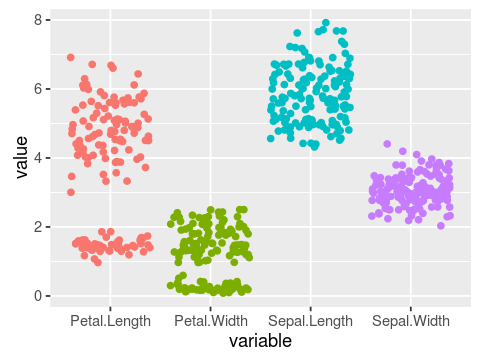

In [13]:
ggplot(df, aes(x=variable, y=value, color=variable)) + 
geom_jitter() + 
guides(color=F)

#### Aesthetic setting

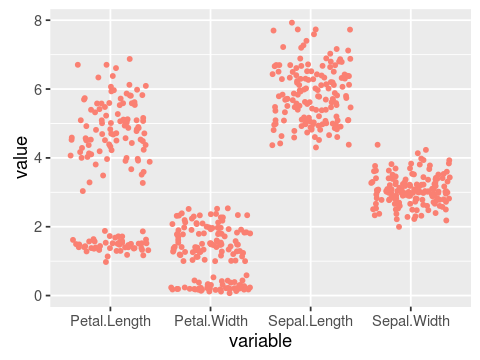

In [14]:
ggplot(df, aes(x=variable, y=value)) + 
geom_jitter(color="salmon", size=1)

### Scales

#### Controlling coordinate mapping

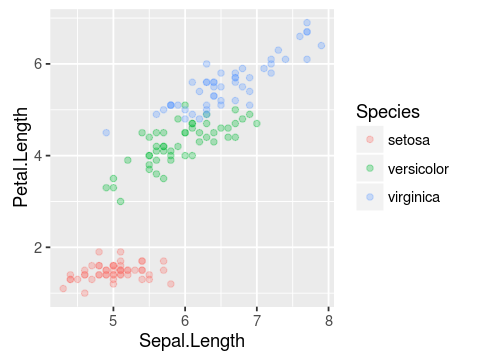

In [15]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3)

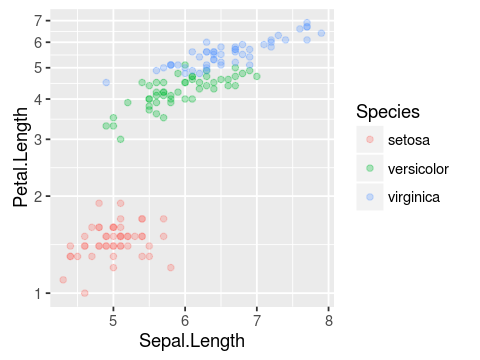

In [16]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) +
scale_y_log10(breaks = 1:7)

#### Controlling color mapping

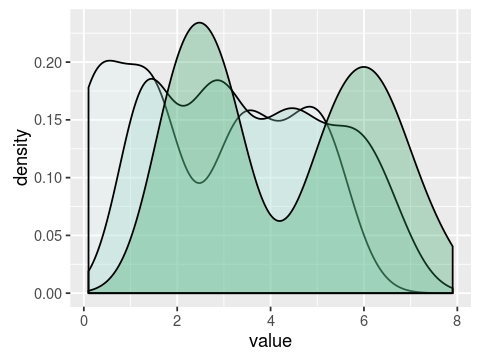

In [17]:
ggplot(df, aes(x=value, fill=Species)) +
geom_density(alpha=0.3) +
guides(fill=F) +
scale_fill_brewer(type="seq", palette=2)

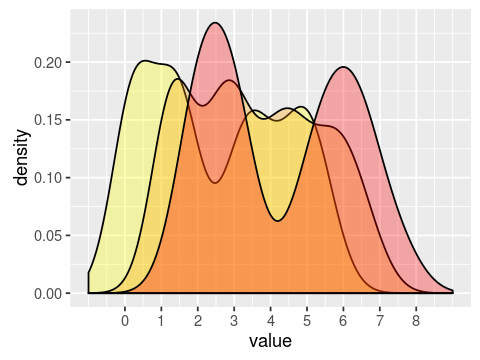

In [18]:
ggplot(df, aes(x=value, fill=Species)) +
geom_density(alpha=0.3) +
guides(fill=F)+ 
scale_fill_manual(values=c("yellow", "orange", "red", "purple")) +
scale_x_continuous(breaks = 0:8, limits = c(-1, 9))

### Statistics (stat)

#### Plotting a function

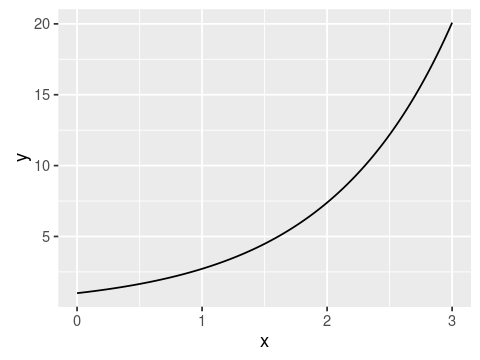

In [19]:
ggplot(data.frame(x = c(0, 3)), aes(x=x)) +
stat_function(fun = exp, geom = "line")

#### Regression

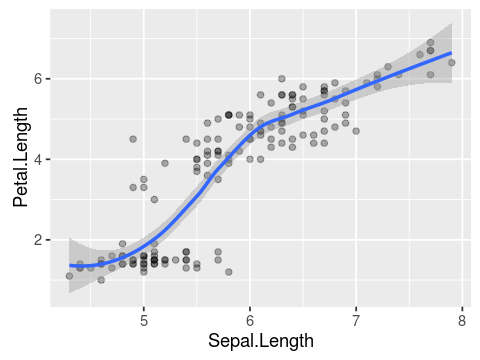

In [20]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length)) +
geom_point(alpha=0.3) + 
stat_smooth(method = loess, se = 0.9)

#### Plotting means the hard way

In [21]:
df1 <- df %>% group_by(variable) %>% 
       summarize(mean=mean(value), se=sd(value)/sqrt(n()))
df1

,variable,mean,se
1,Petal.Length,3.758,0.144135997177411
2,Petal.Width,1.19933333333333,0.0622364450560443
3,Sepal.Length,5.84333333333333,0.0676113162275986
4,Sepal.Width,3.05733333333333,0.0355883331392484


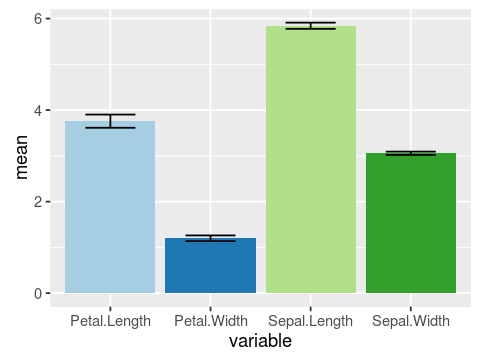

In [22]:
ggplot(df1, aes(x=variable, y=mean, fill=variable)) +
geom_bar(stat="identity") +
geom_errorbar(aes(ymin=mean-se, ymax=mean+se, width=0.5)) +
scale_fill_brewer(type="qual", palette = 3) +
guides(fill=F)

#### If we don't want error bars, you don't need to munge the data

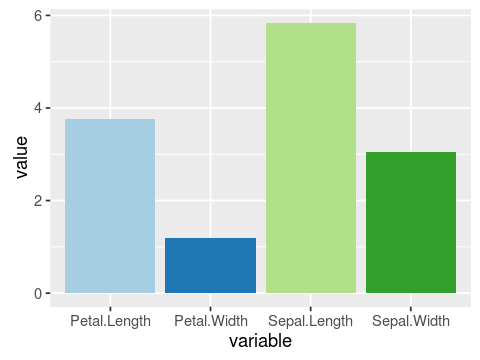

In [23]:
ggplot(df, aes(x=variable, y=value, fill=variable)) +
geom_bar(stat="summary", fun.y="mean") + 
scale_fill_brewer(type="qual", palette = 3) +
guides(fill=F)

### Conditioning on factor variables

#### Grouping

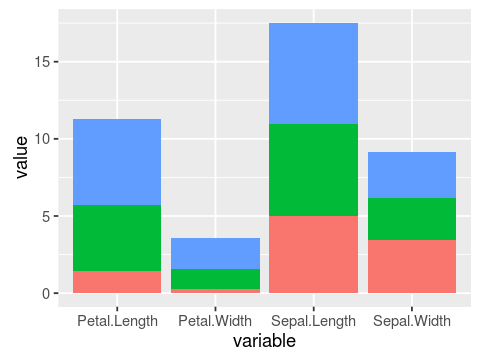

In [24]:
ggplot(df, aes(x=variable, y=value, fill=Species)) +
geom_bar(stat="summary", fun.y="mean") +
guides(fill=F)

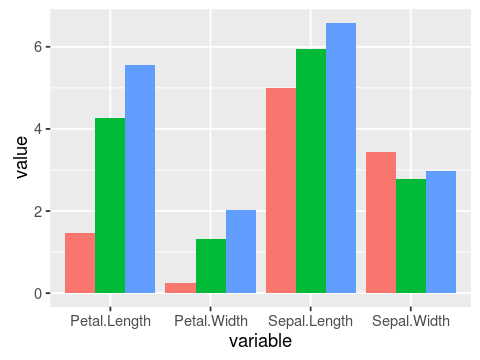

In [25]:
ggplot(df, aes(x=variable, y=value, fill=Species)) +
geom_bar(stat="summary", fun.y="mean", position = "dodge") +
guides(fill=F)

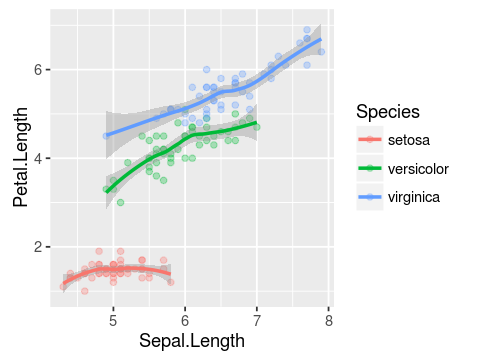

In [26]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) + 
stat_smooth(method = loess, se = 0.9)

#### Faceting

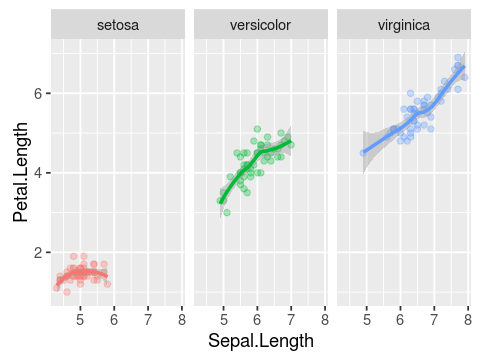

In [27]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) + 
stat_smooth(method = loess, se = 0.9) +
facet_grid(. ~ Species) +
guides(color=F)

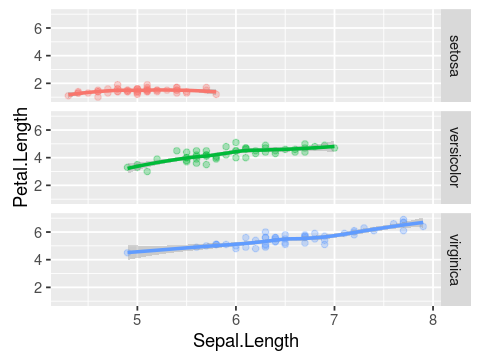

In [28]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) + 
stat_smooth(method = loess, se = 0.9) +
facet_grid(Species ~ .) +
guides(color=F)

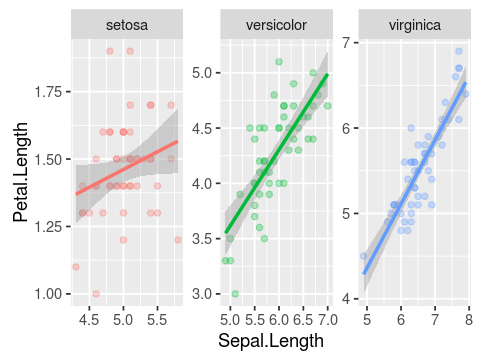

In [29]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) + 
stat_smooth(method = lm, se = 0.9) +
facet_wrap(~ Species, scales = "free") +
guides(color=F)

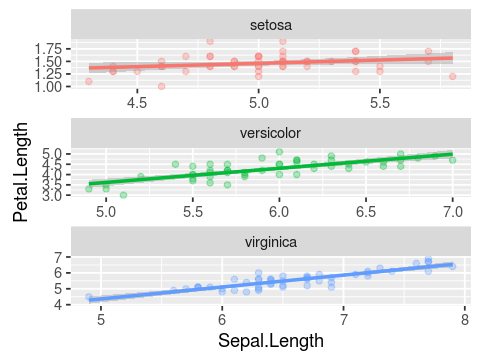

In [30]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
geom_point(alpha=0.3) + 
stat_smooth(method = lm, se = 0.9) +
facet_wrap(~ Species, nrow = 3, scales = "free") +
guides(color=F)

### Controlling the appearance with lables, annotations and themes

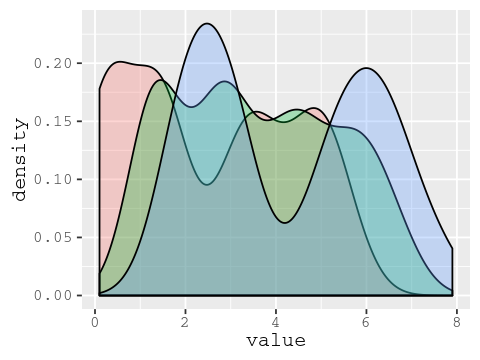

In [31]:
ggplot(df, aes(x=value, fill=Species)) +
geom_density(alpha=0.3) +
guides(fill=F)+ 
theme_grey(base_size = 12, base_family = "Courier")

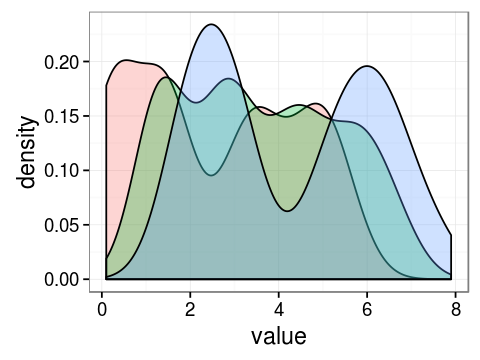

In [32]:
ggplot(df, aes(x=value, fill=Species)) +
geom_density(alpha=0.3) +
guides(fill=F)+ 
theme_bw(base_size = 14, base_family = "Helvetica")

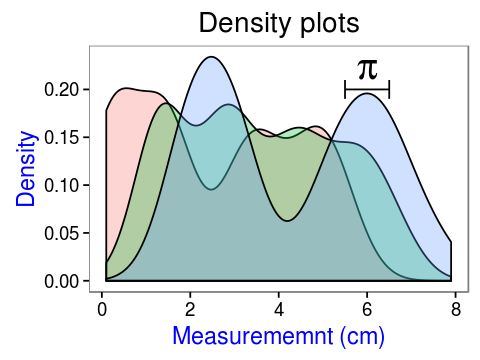

In [33]:
ggplot(df, aes(x=value, fill=Species)) +
geom_density(alpha=0.3) +
guides(fill=F) + 
labs(title="Density plots", x="Measurememnt (cm)", y="Density") +
annotate("text", parse=T, label="pi", x=6, y=0.22, size=8) +
annotate("segment", x=5.5, xend=6.5, y=0.2, yend=0.2, 
         arrow=arrow(ends="both", angle=90, length=unit(0.2, "cm"))) +
theme_bw(base_size = 14, base_family = "Helvetica") +
theme(axis.title = element_text(color="blue"),
      axis.title = element_text(color="red"),
      panel.grid.minor = element_blank(),
      panel.grid.major = element_blank())

## Gallery of interesting plots

### Radial plots

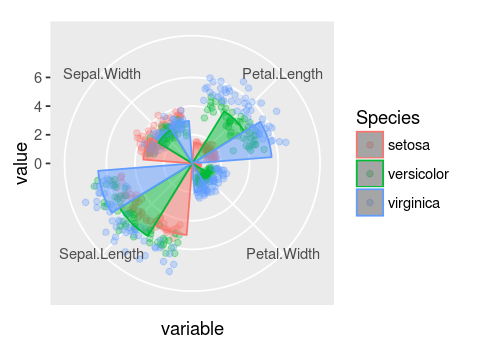

In [34]:
ggplot(df, aes(x=variable, y=value, color=Species, fill=Species)) +
geom_jitter(alpha=0.3) +
geom_bar(stat="summary", fun.y="mean", position="dodge", alpha=0.5) +
guides(fill=F) +
coord_polar()

### Time series data

In [35]:
sales <- scan("http://robjhyndman.com/tsdldata/data/fancy.dat")
sales.ts <- ts(sales, frequency=12, start=c(1987,1))
sales.ts

           Jan       Feb       Mar       Apr       May       Jun       Jul
1987   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
1988   2499.81   5198.24   7225.14   4806.03   5900.88   4951.34   6179.12
1989   4717.02   5702.63   9957.58   5304.78   6492.43   6630.80   7349.62
1990   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75   8121.22
1991   4826.64   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55
1992   7615.03   9849.69  14558.40  11587.33   9332.56  13082.09  16732.78
1993  10243.24  11266.88  21826.84  17357.33  15997.79  18601.53  26155.15
           Aug       Sep       Oct       Nov       Dec
1987   3566.34   5021.82   6423.48   7600.60  19756.21
1988   4752.15   5496.43   5835.10  12600.08  28541.72
1989   8176.62   8573.17   9690.50  15151.84  34061.01
1990   7979.25   8093.06   8476.70  17914.66  30114.41
1991  12552.22  11637.39  13606.89  21822.11  45060.69
1992  19888.61  23933.38  25391.35  36024.80  80721.71
1993  28586.52 

In [36]:
suppressPackageStartupMessages(library(zoo))

In [37]:
df.sales <- data.frame(date=as.Date(as.Date(as.yearmon(time(sales.ts)))), 
                       sales=as.matrix(sales.ts))
head(df.sales)

,date,sales
1,6209.00,1664.81
2,6240.00,2397.53
3,6268.00,2840.71
4,6299.00,3547.29
5,6329.00,3752.96
6,6360.00,3714.74


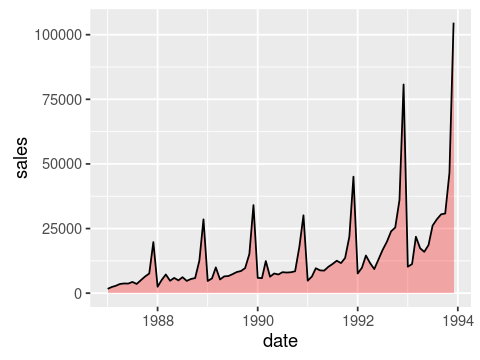

In [38]:
ggplot(df.sales, aes(x=date, y=sales)) + 
geom_area(fill="red", alpha=0.3) +
geom_line()

### Maps

In [39]:
if (!require("maps")) {
install.packages("maps")
suppressPackageStartupMessages(library(maps))
}

Loading required package: maps


In [40]:
states <- map_data("state")
head(states)

,long,lat,group,order,region,subregion
1,-87.4620056152344,30.3896808624268,1,1,alabama,NA
2,-87.4849319458008,30.3724918365479,1,2,alabama,NA
3,-87.525032043457,30.3724918365479,1,3,alabama,NA
4,-87.53076171875,30.3323860168457,1,4,alabama,NA
5,-87.5708694458008,30.3266544342041,1,5,alabama,NA
6,-87.5880584716797,30.3266544342041,1,6,alabama,NA


In [41]:
income <- read.csv("income.csv")
income <- setNames(income, c("state", colnames(income)[-1]))
income <- income %>% mutate(state = tolower(state))
head(income)

,state,X2014,X2010,X2009,X2007,X2000
1,alabama,41415,40489,42666,40554,38473
2,alaska,60287,69860,79989,95470,90214
3,american samoa,NA,34254,NA,NA,17018
4,arizona,46709,47357,49693,47085,48126
5,arkansas,38758,37823,38815,38134,37420
6,california,67458,67034,71595,90967,81972


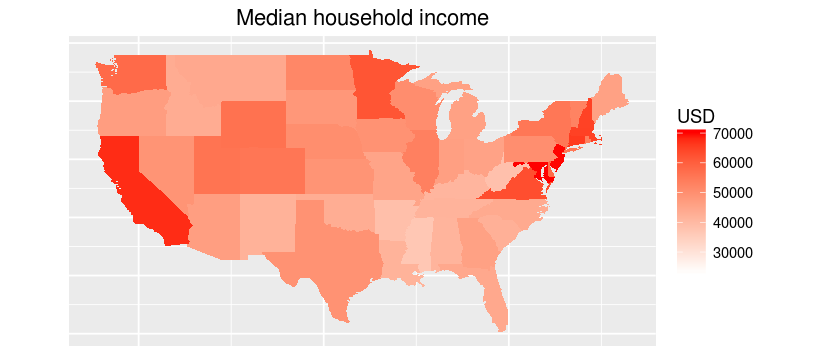

In [42]:
options(repr.plot.width=7)

ggplot(income, aes(map_id = state, fill=X2014)) +
geom_map(map = states) +
scale_fill_gradient(low="white", high="red") +
expand_limits(x = states$long, y = states$lat) +
labs(title="Median household income", fill="USD") +
coord_quickmap() +
theme(axis.title.x=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.title.y=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks.y=element_blank())

### Dendrograms

In [43]:
if (!suppressPackageStartupMessages(require("dendextend"))) {
install.packages("dendextend")
suppressPackageStartupMessages(library(dendextend))
}

In [44]:
d_iris <- dist(iris[, -5])
hc_iris <- hclust(d_iris, method = "complete")
dend <- as.dendrogram(hc_iris)
dend <- color_branches(dend, k=3)
labels(dend) <- rep(c('-','--', '---'), each = 50 )

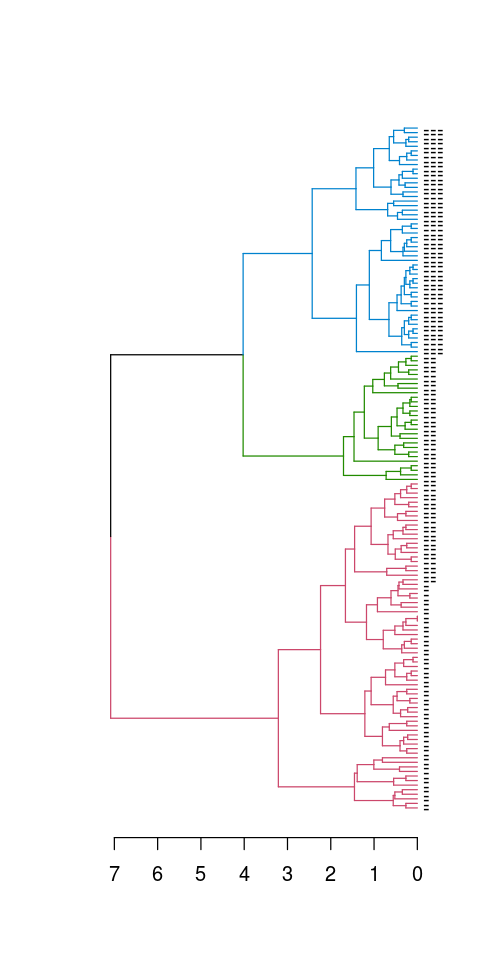

In [45]:
options(repr.plot.width=4, repr.plot.height=8)
plot(dend, horiz=T)

### Graphs

In [46]:
if (!suppressPackageStartupMessages(require("igraph"))) {
install.packages("igraph")
suppressPackageStartupMessages(library(igraph))
}

In [47]:
if (!suppressPackageStartupMessages(require("gcookbook"))) {
install.packages("gcookbook")
suppressPackageStartupMessages(library(gcookbook))
}

In [48]:
head(madmen2)

,Name1,Name2
1,Abe Drexler,Peggy Olson
2,Allison,Don Draper
3,Arthur Case,Betty Draper
4,Bellhop in Baltimore,Sal Romano
5,Bethany Van Nuys,Don Draper
6,Betty Draper,Don Draper


In [49]:
g <- graph.data.frame(madmen2, directed = T)

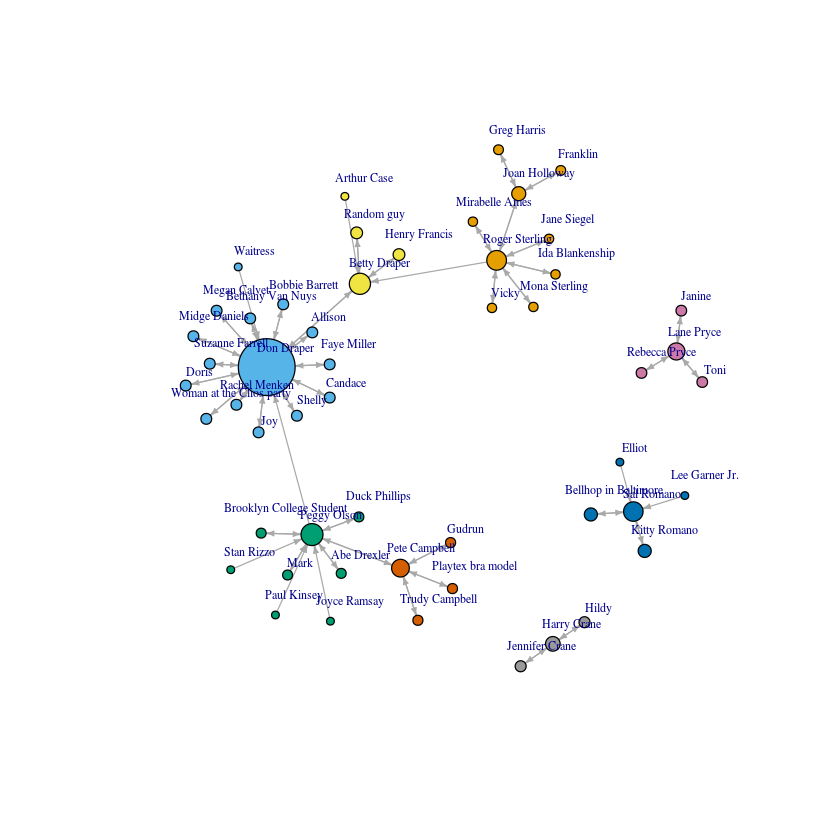

In [50]:
options(op)
pr <- page.rank(g)$vector
wc <- cluster_walktrap(g)
member <- membership(wc)
layout <- layout.fruchterman.reingold(g)
plot(g, vertex.color= member,
     vertex.size=3 + 19*(pr-min(pr))/(max(pr)-min(pr)), 
     layout=layout,  
     vertex.label=V(g)$name,
     vertex.label.cex = .6,
     vertex.label.dist = 0.4, 
     edge.arrow.size=.3)

### Correlatin matrices

In this case, it is simplest to use a specialized plotting package.

In [51]:
iris.cor = cor(iris[,-5])

In [52]:
iris.cor

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [53]:
if (!suppressPackageStartupMessages(require("corrplot"))) {
install.packages("corrplot")
suppressPackageStartupMessages(library(corrplot))
}

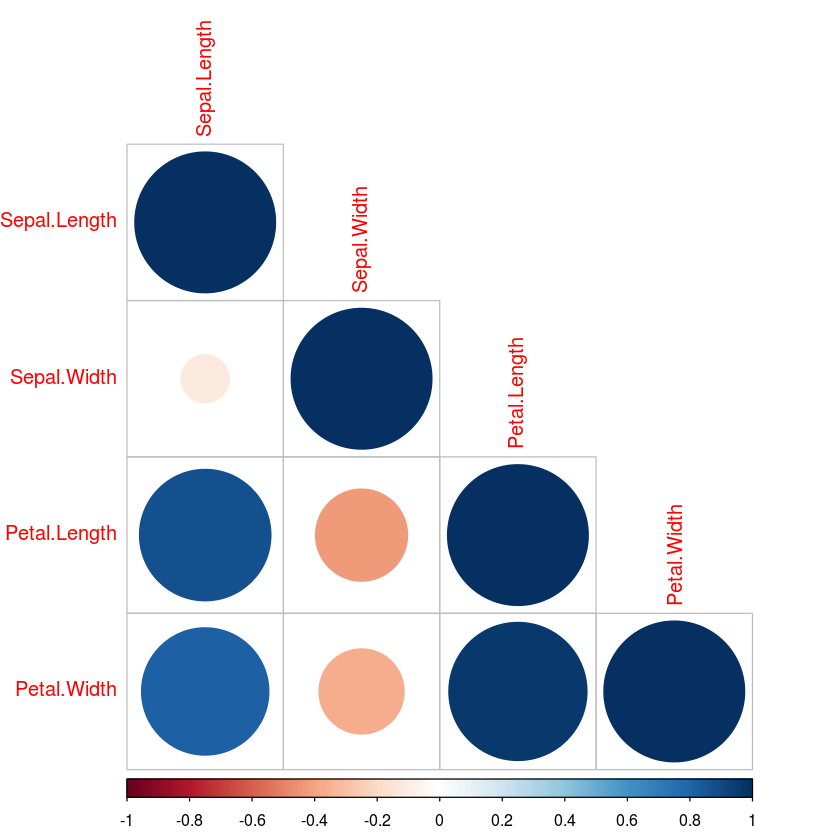

In [54]:
options(repr.plot.width=7)
corrplot(iris.cor, type="lower", tl.cex = 1)

## Reference

### General

- [Official API Reference](http://docs.ggplot2.org/current/)
- [R Graphics Cookbook](http://www.cookbook-r.com/Graphs/)

### Color palettes in Brewer

In [55]:
if (!suppressPackageStartupMessages(require("RColorBrewer"))) {
install.packages("RColorBrewer")
suppressPackageStartupMessages(library(RColorBrewer))
}

In [56]:
options(op)

#### Use a sequential palette when values can be arranged from low to high

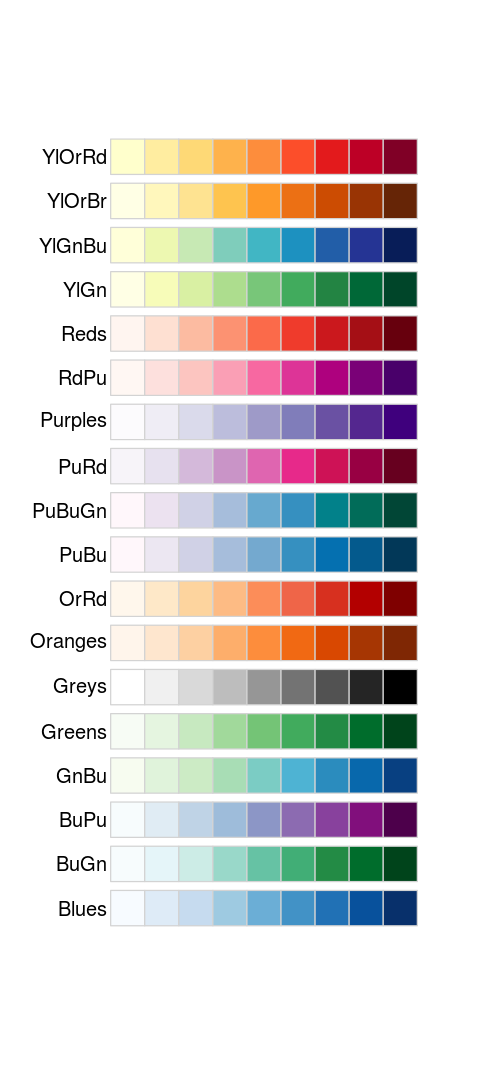

In [57]:
options(repr.plot.width=4, repr.plot.height=9)
display.brewer.all(type="seq")

#### Use a divergent palette wehn you want to highlight extremes

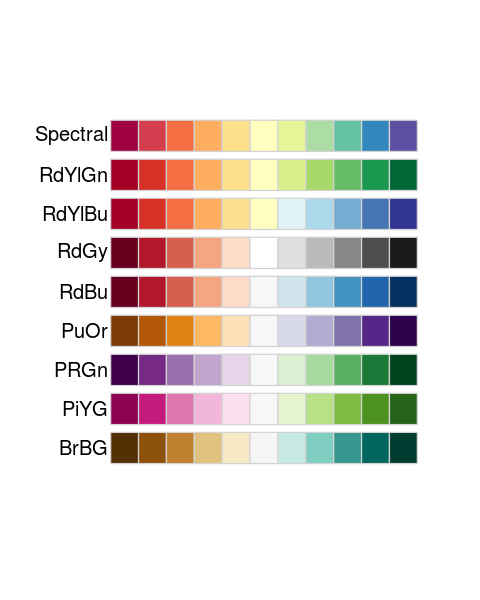

In [58]:
options(repr.plot.width=4, repr.plot.height=5)
display.brewer.all(type="div")

#### Use a qualitative palette when you are displaying categorical values

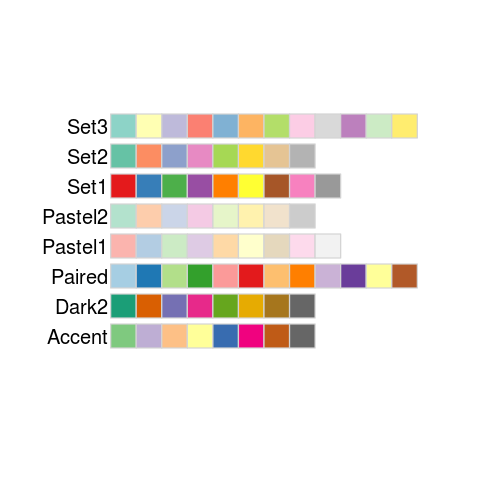

In [59]:
options(repr.plot.width=4, repr.plot.height=4)
display.brewer.all(type="qual")